In [1]:
import os
import sys
print(os.getcwd())
sys.path.append("../WanPy")

from WanPy import *
from pythtb import *
from pythTB_wan import *
import models
import plotting as plot

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

/Users/treycole/Codes/WanPy/top_obstruction


In [2]:
# tight-binding parameters
delta = 1
t = 1
t2 = -0.4 #-0.1

n_super_cell = 2
model = models.Haldane(delta, t, t2).make_supercell([[n_super_cell, 0], [0, n_super_cell]])

lat_vecs = model.get_lat()
orb_vecs = model.get_orb()
n_orb = n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)
low_E_sites = np.arange(0, n_orb, 2)
high_E_sites = np.arange(1, n_orb, 2)

u_wfs_full = wf_array(model, [20, 20])
u_wfs_full.solve_on_grid([0, 0])
chern = u_wfs_full.berry_flux([i for i in range(n_occ)])/(2*np.pi)

In [3]:
save_name = f'C={chern:.1f}_Delta={delta}_t={t}_t2={t2}'

### trial wfs ####

random = False
low_E = True
omit = False

if random:
    omit_num = 1
    n_tfs = n_occ - omit_num
    tf_list = ["random", n_tfs]
elif omit:
    omit_sites = 2
    tf_list = list(np.setdiff1d(low_E_sites, [omit_sites])) # delta on lower energy sites omitting the last site
    # np.random.choice(low_E_sites, n_tfs, replace=False)
    n_tfs = len(tf_list)
elif low_E:
    tf_list = list(low_E_sites)
    n_tfs = len(tf_list)

Wan_frac = n_tfs/n_occ
print(f"# of Wannier functions: {n_tfs}")
print(f"# of occupied bands: {n_occ}")
print(f"Wannier fraction: {Wan_frac}")

if random:
    save_name += '_tfxs=rand'
else:
    save_name += f'_tfx={np.array(tf_list, dtype=int)}'

sv_dir = 'data'
if not os.path.exists(sv_dir):
    os.makedirs(sv_dir)
sv_prefix = 'Haldane_sing_vals'

file_name = f"{sv_dir}/{sv_prefix}_{save_name}"

print(file_name)

S_sing = np.load(f"data/Haldane_sing_vals_{save_name}.npy", allow_pickle=True)

# of Wannier functions: 4
# of occupied bands: 4
Wannier fraction: 1.0
data/Haldane_sing_vals_C=1.0_Delta=1_t=1_t2=-0.4_tfx=[0 2 4 6]


In [4]:
save_name = f'C={chern:.1f}_Delta={delta}_t={t}_t2={t2}'

### trial wfs ####

random = False
low_E = True
omit = True

if random:
    omit_num = 1
    n_tfs = n_occ - omit_num
    tf_list = ["random", n_tfs]
elif omit:
    omit_sites = 2
    tf_list = list(np.setdiff1d(low_E_sites, [omit_sites])) # delta on lower energy sites omitting the last site
    # np.random.choice(low_E_sites, n_tfs, replace=False)
    n_tfs = len(tf_list)
elif low_E:
    tf_list = list(low_E_sites)
    n_tfs = len(tf_list)

Wan_frac = n_tfs/n_occ
print(f"# of Wannier functions: {n_tfs}")
print(f"# of occupied bands: {n_occ}")
print(f"Wannier fraction: {Wan_frac}")

if random:
    save_name += '_tfxs=rand'
else:
    save_name += f'_tfx={np.array(tf_list, dtype=int)}'

sv_dir = 'data'
if not os.path.exists(sv_dir):
    os.makedirs(sv_dir)
sv_prefix = 'Haldane_sing_vals'

file_name = f"{sv_dir}/{sv_prefix}_{save_name}"

print(file_name)

S_dfcnt = np.load(f"data/Haldane_sing_vals_{save_name}.npy", allow_pickle=True)

# of Wannier functions: 3
# of occupied bands: 4
Wannier fraction: 0.75
data/Haldane_sing_vals_C=1.0_Delta=1_t=1_t2=-0.4_tfx=[0 4 6]


In [5]:
k_path = [[0, 0], [2/3, 1/3], [.5, .5], [1/3, 2/3], [0, 0]]
label = (r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $')
nk = 201
(k_vec, k_dist, k_node) = model.k_path(k_path, nk, report=False)

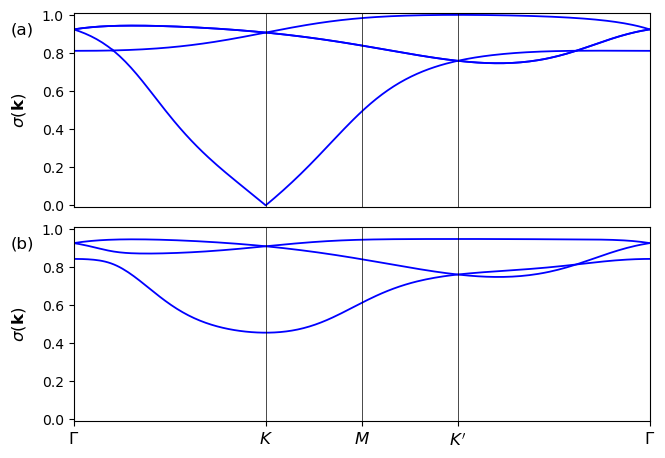

In [6]:
# figure for bandstructure
fig, ax = plt.subplots(2,1, gridspec_kw={'hspace':0.1}, sharex=True)

for n in range(S_sing.shape[-1]):
  ax[0].plot(k_dist, S_sing[:, n], c='b', lw=1.3)

# add vertical lines at node positions
for n in range(len(k_node)):
  ax[0].axvline(x=k_node[n], linewidth=0.5, color='k')

ax[0].set_xlim(k_node[0], k_node[-1])
ax[0].set_ylim(-0.01, 1.01)
# ax[0].set_xticks(k_node)
# ax[0].set_xticklabels(label)
ax[0].xaxis.set_ticks_position('none') 
ax[0].set_ylabel(r"$\sigma(\mathbf{k})$", size=12)
ax[0].yaxis.labelpad = 10
ax[0].text(-.11, 0.9, '(a)', size=12)

for n in range(S_dfcnt.shape[-1]):
  ax[1].plot(k_dist, S_dfcnt[:, n], c='b', lw=1.3)

# add vertical lines at node positions
for n in range(len(k_node)):
  ax[1].axvline(x=k_node[n], linewidth=0.5, color='k')

ax[1].set_xlim(k_node[0], k_node[-1])
ax[1].set_ylim(-0.01, 1.01)
ax[1].set_xticks(k_node)
ax[1].set_xticklabels(label, size=12)
ax[1].set_ylabel(r"$\sigma(\mathbf{k})$", size=12)
ax[1].yaxis.labelpad = 10
ax[1].text(-.11, 0.9, '(b)', size=12)

plt.subplots_adjust(top=0.95, left=0.1, bottom=0.1, right=1)

# ax[0].set_title(
#   "Haldane model \n"
#   fr"$C = {chern_occ: .1f}$, $\Delta = {delta}$, $t= {t: .2f}, t_2 = {t2: .2f}$"
#   )
# ax[0].set_xlabel("Path in k-space")

save_name = f'C={chern:.1f}_Delta={delta}_t={t}_t2={t2}_n_occ={n_occ}_comparison'

plt.savefig(f'images/Haldane_2x2SC_{save_name}.png', dpi=700)